In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [22]:
train_dir = 'C:\\Bangkit\\ML\\code\\preprocessing\\split\\xxx\\train'
val_dir = 'C:\\Bangkit\\ML\\code\\preprocessing\\split\\xxx\\val'
test_dir = 'C:\\Bangkit\\ML\\code\\preprocessing\\split\\xxx\\test'

In [23]:
#Hyperparameter
image_size = (224, 224)
batch_size = 32
epochs = 25
learning_rate = 0.0001

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1200 images belonging to 10 classes.


In [25]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 150 images belonging to 10 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 150 images belonging to 10 classes.


In [27]:
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Build the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\hp\AppData\Local\Temp\ipykernel_14780\2261410678.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [28]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, None,      │        864 │ input_layer_1[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, None,      │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, None,      │          0 │ bn_Conv1[0][0]    │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │          0 │ expanded_conv_de… │
│ (ReLU)              │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        512 │ expanded_conv_de… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, None,      │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, None,      │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, None,      │          0 │ block_1_expand_B… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, None,      │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, None,      │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │          0 │ block_1_depthwis… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, None,      │      2,304 │ block_1_depthwis

 Total params: 3,584,074 (13.67 MB)

 Trainable params: 1,324,042 (5.05 MB)

 Non-trainable params: 2,260,032 (8.62 MB)

In [29]:
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [30]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/25


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 599ms/step - accuracy: 0.6153 - loss: 1.4294 - val_accuracy: 0.8800 - val_loss: 0.3453 - learning_rate: 0.0010
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 585ms/step - accuracy: 0.9702 - loss: 0.1026 - val_accuracy: 0.9000 - val_loss: 0.2252 - learning_rate: 0.0010
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 602ms/step - accuracy: 0.9860 - loss: 0.0459 - val_accuracy: 0.9533 - val_loss: 0.1204 - learning_rate: 0.0010
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - accuracy: 0.9913 - loss: 0.0336 - val_accuracy: 0.9733 - val_loss: 0.0828 - learning_rate: 0.0010
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 606ms/step - accuracy: 0.9980 - loss: 0.0121 - val_accuracy: 0.9867 - val_loss: 0.0650 - learning_rate: 0.0010
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 603ms/step - accuracy: 0.9975 - loss: 0.0106 - val_accuracy: 0.9733 - val_loss: 0.0694 - learning_rate: 0.0010
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 594ms/step - accuracy: 0.9984 - loss: 0.0106 - val_

In [31]:
# Fine-tune some layers of the base model
for layer in base_model.layers[-30:]:
    layer.trainable = True

In [32]:
# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=learning_rate * 0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 75s 930ms/step - accuracy: 0.8111 - loss: 0.6186 - val_accuracy: 0.9933 - val_loss: 0.0403 - learning_rate: 1.0000e-05
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 766ms/step - accuracy: 0.8583 - loss: 0.4130 - val_accuracy: 0.9733 - val_loss: 0.0532 - learning_rate: 1.0000e-05
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 764ms/step - accuracy: 0.9075 - loss: 0.2743 - val_accuracy: 0.9667 - val_loss: 0.0671 - learning_rate: 1.0000e-05
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 832ms/step - accuracy: 0.9382 - loss: 0.1906 - val_accuracy: 0.9667 - val_loss: 0.0731 - learning_rate: 1.0000e-05
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 672ms/step - accuracy: 0.9431 - loss: 0.1670 - val_accuracy: 0.9600 - val_loss: 0.0729 - learning_rate: 1.0000e-05
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 616ms/step - accuracy: 0.9351 - loss: 0.1972 - val_accuracy: 0.9600 - val_loss: 0.0795 - learning_rate: 1.0000e-05
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 851ms/step - acc

In [33]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')

5/5 - 2s - 345ms/step - accuracy: 0.9533 - loss: 0.1714
Test accuracy: 0.95333331823349


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Get class labels
class_labels = list(test_generator.class_indices.keys())

In [35]:
# Make predictions on the test data
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 518ms/step


In [36]:
# True classes
true_classes = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

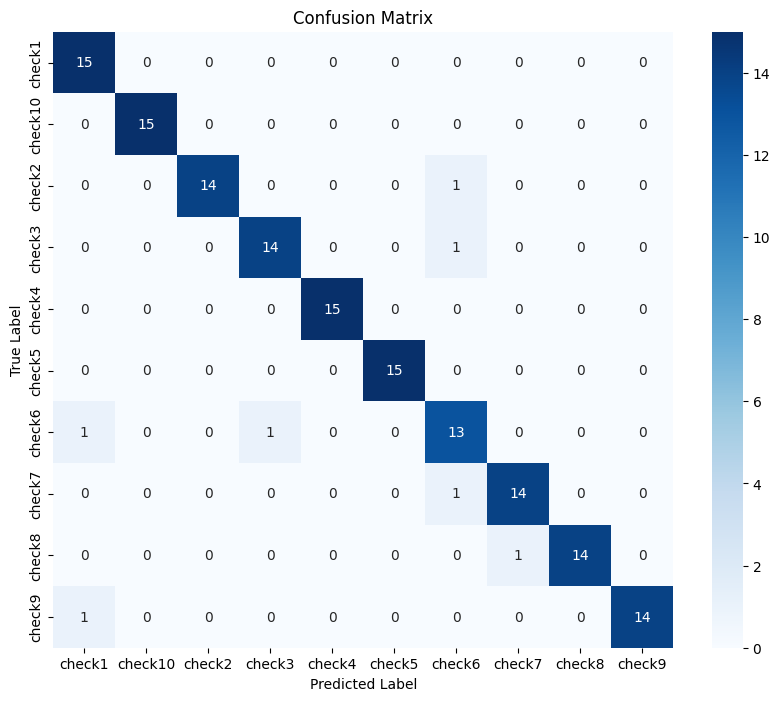

              precision    recall  f1-score   support

      check1       0.88      1.00      0.94        15
     check10       1.00      1.00      1.00        15
      check2       1.00      0.93      0.97        15
      check3       0.93      0.93      0.93        15
      check4       1.00      1.00      1.00        15
      check5       1.00      1.00      1.00        15
      check6       0.81      0.87      0.84        15
      check7       0.93      0.93      0.93        15
      check8       1.00      0.93      0.97        15
      check9       1.00      0.93      0.97        15

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150



In [37]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [38]:
# Calculate precision, recall, and f1-score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9561519607843139
Recall: 0.9533333333333334
F1 Score: 0.9539428068223953


In [39]:
model_json = model.to_json()
with open("model-xxx.json", "w") as json_file:
    json_file.write(model_json)

In [40]:
import numpy as np

# Mengambil bobot dari model
weights = model.get_weights()

# Menentukan jumlah shard
num_shards = 4
shard_size = len(weights) // num_shards

# Menyimpan bobot ke beberapa shard
for i in range(num_shards):
    start_index = i * shard_size
    end_index = (i + 1) * shard_size if i < num_shards - 1 else len(weights)
    shard_weights = weights[start_index:end_index]
    shard_file = f'group-shard{i+1}of{num_shards}.bin'
    np.save(shard_file, shard_weights)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
